Converged after 64 iterations.

Estimated number of clusters: 5
Homogeneity: 1
Completeness: 1
V-measure: 1
Adjuster Rand Index: 1
Adjuster Mutual Information 1
Silhouette Coefficient: 0


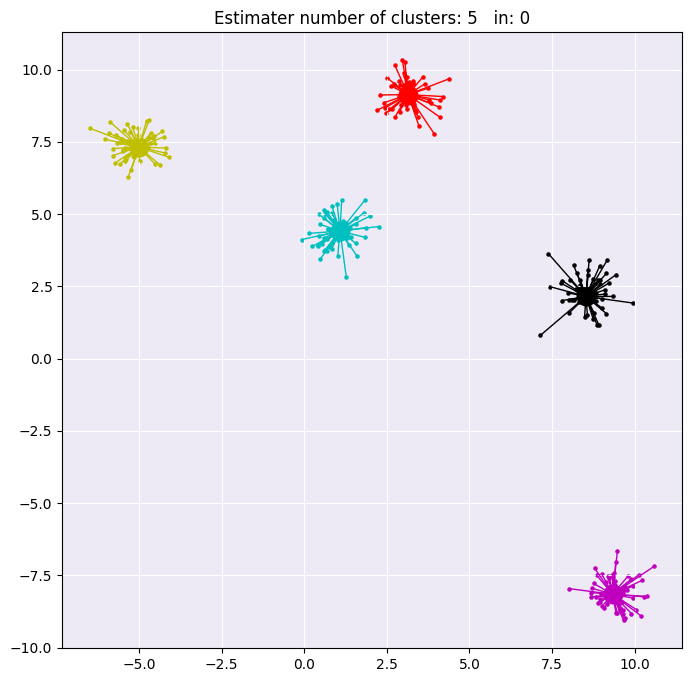

In [84]:
#Affinity Propagation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

import time

np.random.seed(87)

x,labels_true=make_blobs(n_samples=300,n_features=2,centers=5,cluster_std=.5,)

t0=time.time()
af=AffinityPropagation(damping=.5,preference=-50,verbose=True).fit(x)
t1=time.time() - t0

labels=af.labels_
cluster_centers_indices=af.cluster_centers_indices_
n_cluster=af.cluster_centers_indices_.size

print('\nEstimated number of clusters: %d'%n_cluster)
print('Homogeneity: %d'%metrics.homogeneity_score(labels_true,labels))
print('Completeness: %d'%metrics.completeness_score(labels_true,labels))
print('V-measure: %d'%metrics.v_measure_score(labels_true,labels))
print('Adjuster Rand Index: %d'%metrics.adjusted_rand_score(labels_true,labels))
print('Adjuster Mutual Information %d'%metrics.adjusted_mutual_info_score(labels_true,labels))
print('Silhouette Coefficient: %d'%metrics.silhouette_score(x,labels))

plt.close('all')
plt.figure(1,figsize=(8,8))
plt.clf()

plt.axes().set_facecolor('#edeaf6')
plt.grid(color='white')
plt.title('Estimater number of clusters: %d   in: %d' %(n_cluster,t1))

colors=cycle('cmykrgb')

for k,color in zip(range(n_cluster),colors):
    k_members= labels==k
    k_center= x[cluster_centers_indices[k]]
    
    plt.scatter(k_center[0],k_center[1],c=color,s=180,edgecolors=None)
    #plt.plot(k_center[0],k_center[1], color+'o',markeredgecolor='k',markersize=15)
    
    plt.scatter(x[k_members,0],x[k_members,1],c=color,s=5,edgecolors=None)
    #plt.plot(x[k_members,0],x[k_members,1], color+'.',markeredgecolor='k',markersize=5)
    
    for i in x[k_members]:
        plt.plot([k_center[0],i[0]],[k_center[1],i[1]],color,lw=1)
        
   


In [57]:
x.shape


(300, 2)

In [4]:
labels_true.shape

(300,)

In [5]:
af.cluster_centers_.shape

(3, 2)

In [105]:
af.cluster_centers_indices_.shape

(3,)

In [7]:
af.labels_.shape

(300,)

In [8]:
n_cluster

3

In [43]:
af.cluster_centers_indices_

array([201, 210, 235])

In [45]:
np.unique(af.labels_)

array([0, 1, 2])

In [46]:
colors

In [104]:
x[k_members].shape

(100, 2)

In [16]:
af.n_iter_

139

In [18]:
af.convergence_iter

15

In [41]:
k

5


Birch without global clustering as the final step took 1.806 s
number of subcluster centers: 108
number of clusters: 108

Birch with global clustering as the final step took 1.487 s
number of subcluster centers: 108
number of clusters: 100

Time taken to fit KMeans was 1.030 s
number of centers: 100
number of clusters: 100

Time taken to fit MiniBatchKMeans was 0.160 s
number of centers: 100
number of clusters: 100


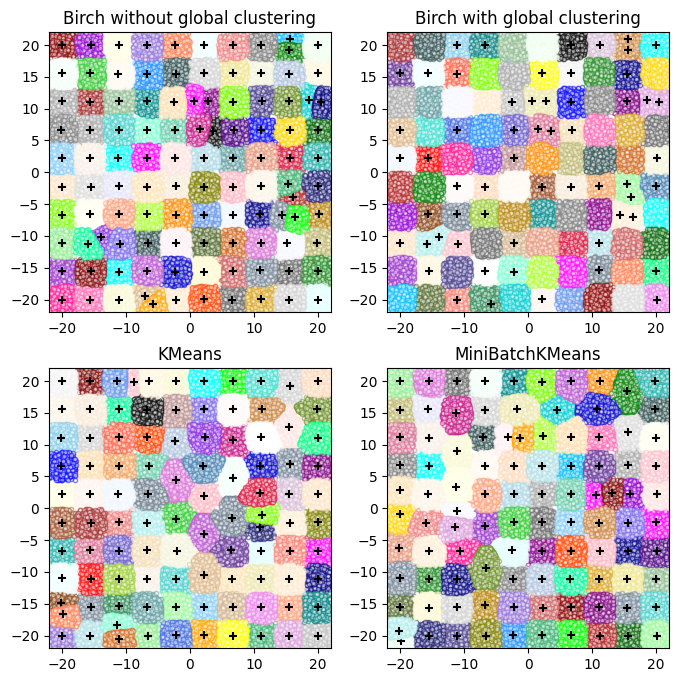

In [337]:
#BIRCH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,MiniBatchKMeans,Birch,AgglomerativeClustering

from time import time
from itertools import cycle
import matplotlib.colors 

np.random.seed(85)

#generate centers for the blobs
x_grid=np.linspace(-20,20,10)
y_grid=np.linspace(-20,20,10)
xx,yy=np.meshgrid(x_grid,y_grid)

n_centers=np.hstack(( np.ravel(xx)[:,np.newaxis] , np.ravel(yy)[:,np.newaxis] ))

#generate dataset
x,labels_true=make_blobs(n_samples=100000,n_features=2,centers=n_centers,cluster_std=1)

#use all colors that matplotlib provides by default
colors_=cycle(colors.cnames.keys())

#compute clustering with and without the final clustering step
#ward=AgglomerativeClustering(n_clusters=100)

birch_models=[Birch(threshold=2,branching_factor=300,n_clusters=None),
             Birch(threshold=2,branching_factor=300,n_clusters=100)]
birch_infos=['without global clustering','with global clustering']

plt.figure(figsize=(8,8))

for idx,(birch_model,info) in enumerate(zip(birch_models,birch_infos)):
    
    t0=time()
    birch_model.fit(x)
    t1=time() - t0
    
    print('\nBirch {} as the final step took {:.3f} s'.format(info,t1))
    
    labels_pred=birch_model.labels_
    centers_pred=birch_model.subcluster_centers_
    n_cluster=np.unique(labels_pred).size
    
    print('number of subcluster centers: %s'%centers_pred.shape[0])
    print('number of clusters: %s'%n_cluster)
    plt.subplot(2,2,idx+1)
    
    for k,i_center,col in zip( range(len(centers_pred)), centers_pred, colors_):
        
        #print(k)
        
        k_member= labels_pred==k
        
        plt.scatter(x[k_member,0],x[k_member,1],c='w',edgecolors=col,marker='.',alpha=.5)
        
        #if birch_model.n_clusters==None:
        plt.scatter(i_center[0],i_center[1],c='k',marker='+',s=30)
        
        plt.xlim(-22,22)
        plt.ylim(-22,22)
        plt.title('Birch %s'%info)
        plt.autoscale(False)
        
########################################################################################
#compute clustering with KMeans and MiniBatchKMeans
Models=[KMeans(init='k-means++',n_init=1,n_clusters=100,max_iter=300),
       MiniBatchKMeans(init='k-means++',n_init=1,n_clusters=100,max_iter=100)]
Infos=['KMeans',"MiniBatchKMeans"]
plt_idx=3

for idx,(model,info) in enumerate(zip(Models,Infos)):
    
    t0=time()
    model.fit(x)
    t1=time() - t0
    
    print('\nTime taken to fit {} was {:.3f} s'.format(info,t1))
    
    labels_pred=model.labels_
    centers_pred=model.cluster_centers_
    n_cluster=np.unique(model.labels_).size
    
    print('number of centers: %s'%centers_pred.shape[0])
    print('number of clusters: %s'%n_cluster)
    plt.subplot(2,2,plt_idx+idx)
    
    for k,i_center,col in zip( range(len(centers_pred)), centers_pred, colors_):
        
        #print(k)
        
        k_member= labels_pred==k
        
        plt.scatter(x[k_member,0],x[k_member,1],c='w',edgecolors=col,marker='.',alpha=.5)
        
        #if birch_model.n_clusters==None:
        plt.scatter(i_center[0],i_center[1],c='k',marker='+',s=30)
        
        plt.xlim(-22,22)
        plt.ylim(-22,22)
        plt.title('%s'%info)
        plt.autoscale(False)


In [298]:
x_grid[:,np.newaxis]


array([[-20.        ],
       [-15.55555556],
       [-11.11111111],
       [ -6.66666667],
       [ -2.22222222],
       [  2.22222222],
       [  6.66666667],
       [ 11.11111111],
       [ 15.55555556],
       [ 20.        ]])

In [299]:
xx.shape

(10, 10)

In [300]:
np.ravel(xx).shape

(100,)

In [301]:
np.ravel(xx)[:,np.newaxis].shape

(100, 1)

In [302]:
n_centers.shape

(100, 2)

In [303]:
len(colors.cnames.values())

148

In [304]:
(birch_model.labels_).shape

(100000,)

In [305]:
birch_model.subcluster_centers_.shape


(144, 2)

In [306]:
birch_model.subcluster_labels_.shape

(144,)

In [313]:
np.sort(birch_model.subcluster_labels_)

array([ 0,  0,  0,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,
        6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 14,
       14, 15, 15, 16, 17, 17, 18, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24,
       24, 25, 25, 26, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 42, 43, 44, 45, 45, 46, 46, 47,
       47, 48, 49, 50, 51, 52, 53, 53, 54, 54, 55, 56, 57, 57, 57, 58, 59,
       60, 60, 61, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95, 96, 97, 98, 99])

In [314]:
np.unique(birch_model.subcluster_labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [308]:
labels_pred.shape

(100000,)

In [309]:
np.unique(labels_pred).size

100

In [310]:
x[labels_pred==0]

array([[15.99119331, 22.53253191],
       [15.2881735 , 19.07237453],
       [16.2718276 , 20.03610015],
       ...,
       [16.99245283, 21.15972993],
       [15.31502346, 19.06410946],
       [16.34267333, 18.69486745]])

Elapsed time to fit model: 0.63
Band Width: 1.0680263842103683
Number of clusters: 4



Text(0.5, 1.0, 'Estimated number of clusters: 4')

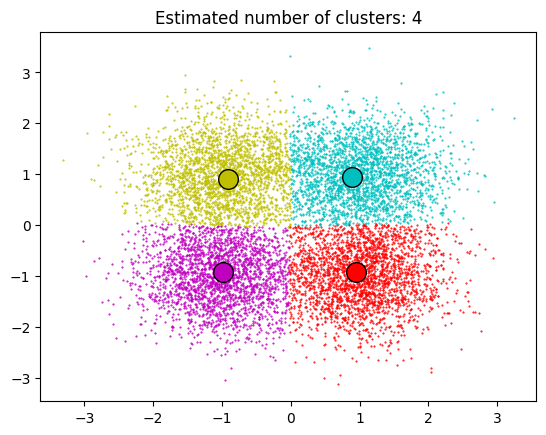

In [1]:
#Density Model Clustering
#Mean Shift

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.metrics import accuracy_score,homogeneity_score

from time import time
from itertools import cycle
import matplotlib.colors 

np.random.seed(78)

#generating sample data
dataset_centers=[[1,1],[-1,1],[-1,-1],[1,-1]]
t0=time()
x,labels_true=make_blobs(n_samples=10000,n_features=2,centers=dataset_centers,cluster_std=.6)
t1=time()-t0
#print('Elapsed time to make dataset: %d'%t1)

#computing clustering with MeanShift
#the following bandwidth can be automatically detected

band_width=estimate_bandwidth(x,quantile=.2,n_samples=100)

t0=time()
ms=MeanShift(bandwidth=band_width,bin_seeding=True).fit(x)####################################
t1=time() - t0

labels_pred=ms.labels_
centers_pred=ms.cluster_centers_

n_clusters=np.unique(labels_pred).size
n_centers=len(ms.cluster_centers_)

print('Elapsed time to fit model: %.2f'%t1)
print('Band Width: %s'%band_width)

#print('Number of centers: %s'%n_centers)
print('Number of clusters: %s\n'%n_clusters)
#print('Accuracy Score: %d'%accuracy_score(labels_true,labels_pred))
#print('Homogeneity Score: %s'%homogeneity_score(labels_true,labels_pred))

#plot result
plt.figure()
plt.clf()

colors_=cycle('cmyrgb')

for k,col in zip(range(n_clusters),colors_):
    k_members= labels_pred==k
    k_center=centers_pred[k]
    '''
    for i in x[k_members]:
        plt.plot( [k_center[0],i[0]] , [k_center[1],i[1]] ,col,lw=1)
    '''
    plt.scatter(x[k_members,0],x[k_members,1],c=col,marker='.',s=1)
    plt.scatter(k_center[0],k_center[1],c=col,edgecolors='k',s=200)
        
#plt.scatter(centers_pred[:,0],centers_pred[:,1],c='w',edgecolors='k',s=200,linewidths=2)    
    
plt.title('Estimated number of clusters: %d'%n_clusters)

In [345]:
ms.labels_.shape

(1000,)

In [348]:
ms.cluster_centers_

array([[-5.63621891, -1.25971691],
       [ 6.13629711,  3.70198308]])

In [349]:
np.unique(labels_pred)

array([0, 1])

In [357]:
(labels_true==labels_pred).sum()

250

In [363]:
x[k_members].shape

(500, 2)

In [364]:
k_center

array([ 8.40336252, -6.4125147 ])

In [365]:
ms.cluster_centers_

array([[ 8.40336252, -6.4125147 ],
       [ 9.22872055,  7.31820086],
       [-7.28264037, -0.66226396]])

In [428]:
ms.bandwidth

1.1882062797860986

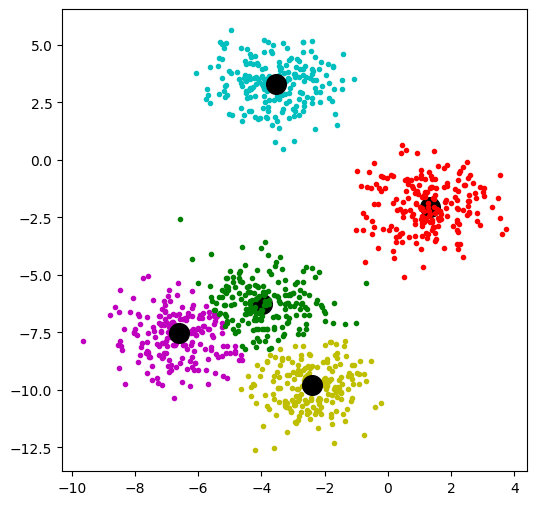

In [56]:
#Spectral Clustering

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering

from itertools import cycle

np.random.seed(60)

x,labels_true,centers_true=make_blobs(n_samples=1000,n_features=2,centers=5,cluster_std=1,return_centers=True)

clt=SpectralClustering(n_clusters=5,assign_labels='discretize').fit(x)

labels_pred=clt.labels_
n_cluster=np.unique(labels_pred).size


colors_=cycle('cmyrgb')
plt.figure(1,figsize=(6,6))

for k,col in zip(range(n_cluster),colors_):
    k_members= labels_pred==k
    
    plt.scatter(x[k_members,0],x[k_members,1],c=col,marker='.')
    plt.scatter(centers_true[k,0],centers_true[k,1],c='k',edgecolors='k',s=200)

In [11]:
clt.affinity_matrix_.shape

(1000, 1000)

In [18]:
n_cluster

array([0, 1, 2, 3, 4], dtype=int32)

In [51]:
centers_true

array([[-3.9825334 , -6.26108367],
       [-3.53634646,  3.31499141],
       [ 1.33941602, -2.03492082],
       [-2.41170169, -9.78836928],
       [-6.59268798, -7.53213259]])

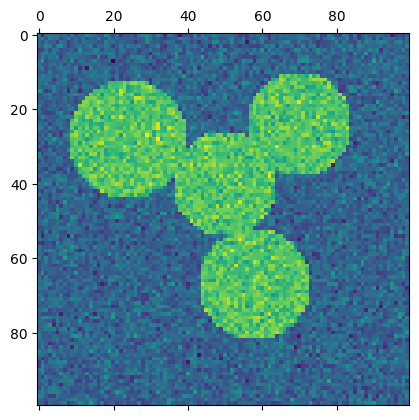

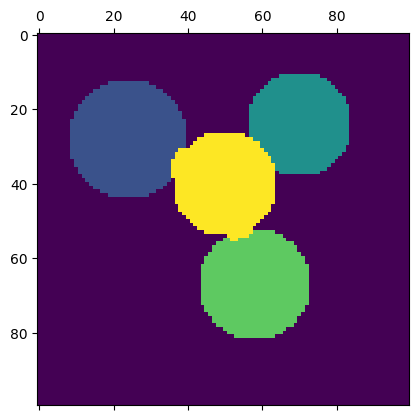

In [139]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)
plt.show()

In [68]:
x.shape

(100, 100)

In [69]:
y.shape

(100, 100)

In [72]:
circle1.shape

(100, 100)

In [96]:
np.unique(circle1)

array([False,  True])

In [97]:
np.unique(img)

array([0., 1.])

In [123]:
img.shape

(100, 100)

In [117]:
mask.shape

(100, 100)

In [105]:
graph

<2678x2678 sparse matrix of type '<class 'numpy.float64'>'
	with 13004 stored elements in COOrdinate format>

In [107]:
graph.data.shape

(13004,)

In [118]:
labels.shape

(2678,)

In [122]:
np.unique(label_im)

array([-1.,  0.,  1.,  2.,  3.])

In [124]:
label_im.shape

(100, 100)

Estimated number of cluster: 4
Estimated number of noise samples: 4
Estimated number of core points: 967 non-core points: 33

Homogeneity Score: 0.992
Completeness Score: 0.978
V-Measure Score: 0.985
Adjusted Rand Score 0.992
Adjusted Mutual Score 0.985
0
1
2
3
-1


Text(0.5, 1.0, 'Estimated number of cluster: 4')

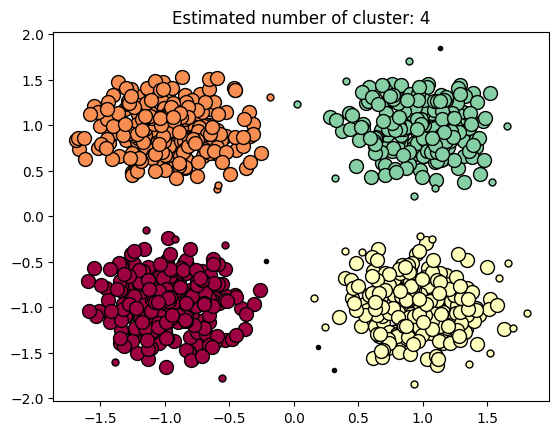

In [482]:
#DBSCAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

np.random.seed(52)

centers_dataset=[[1,1],[1,-1],[-1,-1],[-1,1]]
x,labels_true=make_blobs(n_samples=1000,n_features=2,centers=centers_dataset,cluster_std=.3)

x=StandardScaler().fit_transform(x)

clus=DBSCAN(eps=.3,min_samples=10).fit(x)##############################

labels_pred=clus.labels_
core_samples=np.zeros_like(labels_pred,dtype=bool)
core_samples[clus.core_sample_indices_]=True

clusters_pred=set(labels_pred)
n_cluster= len(set(labels_pred)) - (1 if -1 in labels_pred else 0)
n_noise=list(labels_pred).count(-1)

print('Estimated number of cluster: %d'%n_cluster)
print('Estimated number of noise samples: %d'%n_noise)
print('Estimated number of core points: %d non-core points: %d'
      %(list(core_samples).count(True),list(core_samples).count(False)))

print('\nHomogeneity Score: %.3f'%metrics.homogeneity_score(labels_true,labels_pred))
print('Completeness Score: %.3f'%metrics.completeness_score(labels_true,labels_pred))
print('V-Measure Score: %.3f'%metrics.v_measure_score(labels_true,labels_pred))
print('Adjusted Rand Score %.3f'%metrics.adjusted_rand_score(labels_true,labels_pred))
print('Adjusted Mutual Score %.3f'%metrics.adjusted_mutual_info_score(labels_true,labels_pred))
#print('Silhouette Score %.3f\n'%metrics.silhouette_score(x,labels_pred))

#plot the result
colors=[ plt.cm.Spectral(i) for i in np.linspace(0,1,len(set(labels_pred)))]
#plt.axes().set_facecolor('aliceblue')

for k,col in zip(clusters_pred,colors):
    k_members= labels_pred==k
    
    size_non_core=5
    
    #set noise points color to black 
    if k== -1:
        col=(0,0,0,1)
        size_non_core=3
    print(k)
    
    x_mask= k_members & core_samples #for ploting core samples
    #plt.scatter(x[x_mask,0],x[x_mask,1],marker='o',c=col,edgecolors='k',s=20) #c=matplotlib.colors.rgb2hex(col)
    plt.plot(x[x_mask,0],x[x_mask,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=10)
    
    x_mask= k_members & ~core_samples #for ploting non-core samples
    #plt.scatter(x[x_mask,0],x[x_mask,1],marker='o',c=col,edgecolors='k',s=60)
    plt.plot(x[x_mask,0],x[x_mask,1],'o',markerfacecolor=col,markeredgecolor='k',markersize=size_non_core)
    

plt.title('Estimated number of cluster: %d'%n_cluster)

In [190]:
clus.components_.shape

(994, 2)

In [191]:
clus.core_sample_indices_.shape

(994,)

In [183]:
clus.labels_.shape

(1000,)

In [184]:
np.zeros_like(clus.labels_,dtype=bool).shape

(1000,)

In [185]:
np.zeros(clus.labels_.shape,dtype=bool).shape

(1000,)

In [348]:
pd.DataFrame(labels_pred).value_counts() #-1 determines noise samples

0
0    250
1    250
2    250
3    250
Name: count, dtype: int64

In [349]:
pd.DataFrame(core_samples).value_counts() #False determines non-core points

0   
True    1000
Name: count, dtype: int64

In [350]:
len(labels_pred)

1000

In [319]:
set(labels_pred)

{0, 1, 2, 3}

In [233]:
np.unique(labels_pred)

array([0, 1, 2, 3])

In [210]:
len(set(labels_pred))

4

In [230]:
len(set(labels_pred)) - (1 if -1 in labels_pred else 0)

4

In [235]:
len(np.unique(labels_pred)) -(1 if -1 in labels_pred else 0)

4

In [229]:
list(labels_pred).count(-1)

0

In [243]:
n_cluster

4

In [244]:
n_noise

0

In [260]:
clusters_pred

{0, 1, 2, 3}

In [269]:
plt.cm.jet(2)

(0.0, 0.0, 0.535650623885918, 1.0)

In [281]:
plt.cm.Spectral(2)

(0.6365244136870435, 0.022683583237216455, 0.26282199154171476, 1.0)

In [286]:
[plt.cm.Spectral(i) for i in range(n_cluster)]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0),
 (0.6365244136870435, 0.022683583237216455, 0.26282199154171476, 1.0),
 (0.6449826989619377, 0.03206459054209919, 0.2648212226066898, 1.0)]

In [288]:
[plt.cm.Spectral(i) for i in np.linspace(0,1,n_cluster)]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [299]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.6280661284121491, 0.013302575932333718, 0.26082276047673975, 1.0),
 (0.6365244136870435, 0.022683583237216455, 0.26282199154171476, 1.0),
 (0.6449826989619377, 0.03206459054209919, 0.2648212226066898, 1.0)]

In [318]:
col

(0.6449826989619377, 0.03206459054209919, 0.2648212226066898, 1.0)

In [334]:
tuple(col)

(0.6449826989619377, 0.03206459054209919, 0.2648212226066898, 1.0)

In [340]:
k

3

In [376]:
matplotlib.colors.to_rgba('#a40844')

(0.6431372549019608, 0.03137254901960784, 0.26666666666666666, 1.0)

In [375]:
matplotlib.colors.rgb2hex((0.6449826989619377, 0.03206459054209919, 0.2648212226066898, 1.0))

'#a40844'

In [408]:
list(core_samples).count(False)

0

In [441]:
clusters_pred

{-1, 0, 1, 2, 3, 4}

In [448]:
n_cluster

5

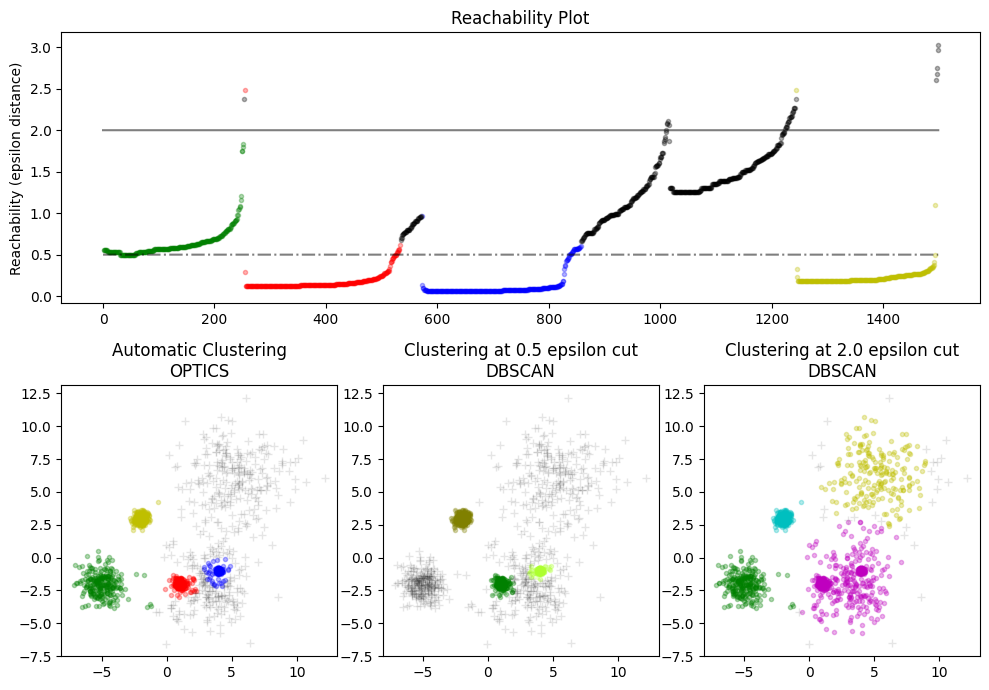

In [607]:
#OPTICS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import OPTICS,cluster_optics_dbscan
import matplotlib.gridspec as gridspec

np.random.seed(2)
n_points_per_cluster=250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
x = np.vstack((C1, C2, C3, C4, C5, C6))

clust=OPTICS(min_samples=50,min_cluster_size=.05,xi=.05).fit(x)###################################

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
             core_distances=clust.core_distances_,ordering=clust.ordering_, eps=0.5)

labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
             core_distances=clust.core_distances_,ordering=clust.ordering_, eps=2)


space=np.arange(len(x))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])


# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)

ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = x[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)

ax2.plot(x[clust.labels_ == -1, 0], x[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = x[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(x[labels_050 == -1, 0], x[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = x[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(x[labels_200 == -1, 0], x[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()








In [540]:
C1.shape

(250, 2)

In [541]:
x.shape

(1500, 2)

In [544]:
space

array([   0,    1,    2, ..., 1497, 1498, 1499])

In [555]:
clust.cluster_hierarchy_.shape

(6, 2)

In [557]:
clust.core_distances_.shape

(1500,)

In [559]:
clust.labels_.shape

(1500,)

In [560]:
set(clust.labels_)

{-1, 0, 1, 2, 3}

In [567]:
clust.ordering_.shape

(1500,)

In [571]:
clust.predecessor_.shape

(1500,)

In [573]:
clust.reachability_.shape

(1500,)

In [586]:
clust.reachability_

array([       inf, 0.92624465, 0.69174658, ..., 1.25082937, 1.57996621,
       1.7087744 ])

In [582]:
clust.ordering_

array([   0,    9,   10, ..., 1308, 1360, 1362])

In [579]:
clust.reachability_[clust.ordering_]

array([       inf, 0.55374906, 0.55374906, ..., 2.75253944, 2.9623476 ,
       3.03145003])